In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn

In [50]:
df = pd.read_csv("../Data/EPL_Soccer_MLR_LR.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


In [53]:
df.shape

(202, 13)

In [54]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


### Cost seems most correlated to the score lets use this to predict the score


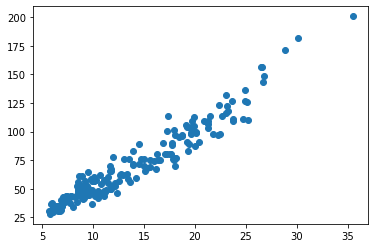

In [55]:
plt.scatter(df['Score'],df['Cost'])
plt.show()

In [56]:
X = df['Cost']
y = df['Score']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.67)

In [57]:
lr = sn.OLS(y_train,X_train).fit()

In [58]:
lr.params

Cost    0.19343
dtype: float64

In [59]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              9549.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                   1.97e-126
Time:                        00:57:07   Log-Likelihood:                         -265.91
No. Observations:                 135   AIC:                                      533.8
Df Residuals:                     134   BIC:                                      536.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1934      0.002     97.718      0.000       0.190       0.197
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.520
Skew:                          -0.078   Prob(JB):                        0.771
Kurtosis:                       3.261   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_train_with_intercept = sn.add_constant(X_train)
lr_1 = sn.OLS(y_train,X_train_with_intercept).fit()

lr_1.summary()

/Users/abhilashkollikonda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1697.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.38e-77
Time:                        00:57:07   Log-Likelihood:                -261.26
No. Observations:                 135   AIC:                             526.5
Df Residuals:                     133   BIC:                             532.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0248      0.333      3.077      0.003       0.366       1.684
Cost           0.1812      0.004     41.194      0.000       0.173       0.190
==============================================================================
Omnibus:                        2.688   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.726
Skew:                           0.328   Prob(JB):                        0.256
Kurtosis:                       2.764   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
b0 = lr_1.params[0]
b1 = lr_1.params[1]
print(lr_1.params)

const    1.024771
Cost     0.181249
dtype: float64


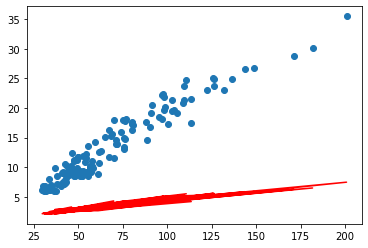

In [62]:
plt.scatter(X_train,y_train)

plt.plot(X_train,b0+b1*y_train,'r')

plt.show()

In [63]:
X_test_with_intercept = sn.add_constant(X_test)
y_test_fitted = lr_1.predict(X_test_with_intercept)

/Users/abhilashkollikonda/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


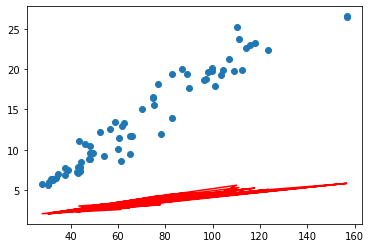

In [64]:
plt.scatter(X_test,y_test)

plt.plot(X_test,b0+b1*y_test,'r')

plt.show()